# Load in Packages

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import fftconvolve
import matplotlib.colors as col
from matplotlib.patches import Rectangle
from matplotlib.ticker import FormatStrFormatter
from skimage.draw import disk
from scipy.optimize import curve_fit
from scipy.integrate import solve_ivp
import csv
import xarray as xr
from collections import defaultdict

import sys, os
sys.path.append(os.path.abspath("R:\Lawson\mpes-analysis"))  # or full path to project
sys.path.append(os.path.abspath("R:\Lawson\specsanalyzer"))  # or full path to project

#sys.path.append(os.path.abspath("/Users/lawsonlloyd/GitHub/mpes-analysis"))  # or full path to project

import mpes
from Loader import DataLoader
from mpes import cmap_LTL, cmap_LTL2
import phoibos

#from specsscan import SpecsScan

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load Path and Scan Database Information

In [53]:
#%% Load Data Scan Info

filename = '2024 Bulk CrSBr Phoibos.csv'

scan_info = {}
data_path = 'R:\Lawson\Data\phoibos'
data_path_info = 'R:\Lawson\CrSBr-analysis-manuscript\Analysis Scripts'

#data_path = '/Users/lawsonlloyd/Desktop/Data/phoibos'
#data_path_info = '/Users/lawsonlloyd//GitHub/CrSBr-analysis-manuscript'

energy_offset, delay_offset, force_offset = 19.62,  0, False

scan_info = phoibos.get_scan_info(data_path_info, filename, {})

In [118]:
scan = 14608

I = phoibos.load_data(data_path, scan, force_offset=False, scan_info = None, energy_offset=19.7+.1, delay_offset=0)

I_res = I/np.max(I)

# Plot the Data

(200, 316)


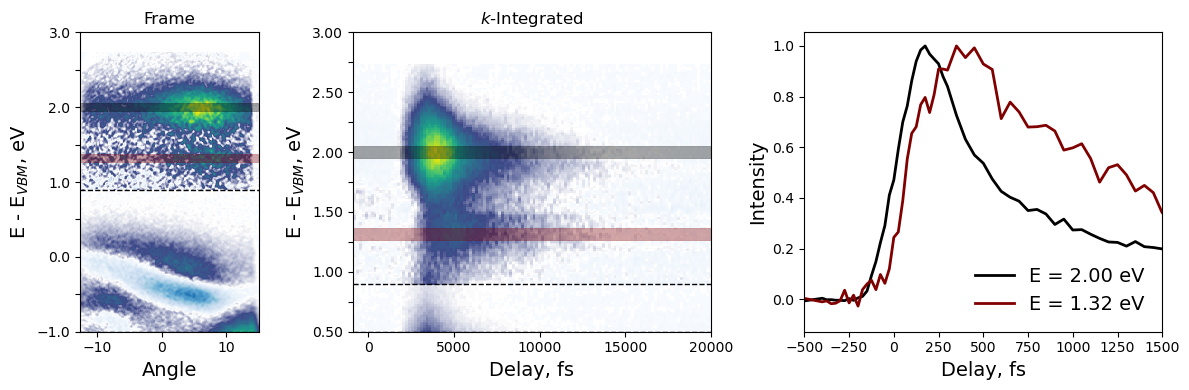

In [117]:
%matplotlib inline

fig, ax = plt.subplots(1, 3, gridspec_kw={'width_ratios': [1, 2, 2], 'height_ratios':[1]})
fig.set_size_inches(12, 4, forward=False)
ax = ax.flatten()

im0 = mpes.plot_phoibos_frame(I_res, fig=fig, ax=ax[0], energy_limits=(-1,3), E_enhance = .9, subtract_neg = True)
waterfall = mpes.plot_waterfall(I_res, 0, 30, fig = fig, ax=ax[1], energy_limits = (0.5, 3), E_enhance = .9, subtract_neg=True)

E, E_int = [2, 1.32], 0.1
colors = ['black', 'maroon', 'grey']
traces = mpes.plot_time_traces(I_res, E, E_int, 0, 30, fig=fig, ax=ax[2], colors = colors)

for i in np.arange(len(E)):
    mpes.add_rect(500, 50000, E[i], E_int, ax[1], edgecolor=colors[i], facecolor=colors[i], alpha = 0.35)
    mpes.add_rect(0, 30, E[i], E_int, ax[0], edgecolor=colors[i], facecolor=colors[i], alpha = 0.35)

ax[2].set_xlim(-500, 1500)
fig.tight_layout()

In [62]:
if delay in I_res.dim:
    a = 2

NameError: name 'delay' is not defined